In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

Read CSV and drop unnecessary columns

In [3]:
df = pd.read_csv('input.csv')

In [ ]:
df = df.drop(columns=['id', 'name', 'orbiting_body', 'sentry_object'])

In [5]:
X = df.drop(columns=['hazardous'])
y = df['hazardous']

Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

Evaluation

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.892998678996037

In [71]:
f1 = f1_score(y_test, y_pred)
f1

0.452515469464622

Hm... Doesn't look too good. Let's compare with a dummy model.

In [18]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [24]:
accuracy_score(y_test, dummy.predict(X_test))

0.9048326728313518

In [76]:
f1_score(y_test, dummy.predict(X_test))

0.0

The dummy seems to do better than our model... Let's try using KNN. We'll have to scale our inputs for this.

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=999)

In [65]:
accuracy_score(y_test, knn.predict(X_test))

0.9082452664024658

Not sure how many neighbors to use here, but since a higher count seems to be better, I will try to loop through.

In [69]:
highest_accuracy = 0
highest_accuracy_neighbors = 0
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        highest_accuracy_neighbors = i
        print(f"New highest accuracy: {highest_accuracy} with {highest_accuracy_neighbors} neighbors")
highest_accuracy, highest_accuracy_neighbors

New highest accuracy: 0.8902465874064289 with 1 neighbors
New highest accuracy: 0.9068141787758697 with 2 neighbors
New highest accuracy: 0.9079700572435051 with 4 neighbors
New highest accuracy: 0.908630559225011 with 6 neighbors
New highest accuracy: 0.908960810215764 with 8 neighbors
New highest accuracy: 0.9107221488331132 with 10 neighbors
New highest accuracy: 0.9111074416556583 with 12 neighbors
New highest accuracy: 0.912373403786878 with 14 neighbors
New highest accuracy: 0.9129788639365918 with 20 neighbors
New highest accuracy: 0.9131439894319683 with 24 neighbors
New highest accuracy: 0.9131990312637605 with 36 neighbors
New highest accuracy: 0.9134742404227213 with 48 neighbors
New highest accuracy: 0.9135292822545135 with 67 neighbors


(0.9135292822545135, 67)

It seems like the highest we got here was 67. Let's try the same evaluation out with f1_score to see if there's any difference.

In [ ]:
highest_f1 = 0
highest_f1_neighbors = 0
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    f1 = f1_score(y_test, knn.predict(X_test))
    print(f"F1 score for {i} neighbors: {f1}")
    if f1 > highest_f1:
        highest_f1 = f1
        highest_f1_neighbors = i
        print(f"New highest F1 score: {highest_f1} with {highest_f1_neighbors} neighbors")
highest_f1, highest_f1_neighbors

F1 score for 1 neighbors: 0.4312606959498003
New highest F1 score: 0.4312606959498003 with 1 neighbors
F1 score for 2 neighbors: 0.30243098475484137
F1 score for 3 neighbors: 0.4030612244897959
F1 score for 4 neighbors: 0.3107996702390767
F1 score for 5 neighbors: 0.3697715289982425
F1 score for 6 neighbors: 0.30833333333333335
F1 score for 7 neighbors: 0.3540280857354028
F1 score for 8 neighbors: 0.29855810008481765
F1 score for 9 neighbors: 0.338996138996139
F1 score for 10 neighbors: 0.301464254952627
F1 score for 11 neighbors: 0.3322658126501201
F1 score for 12 neighbors: 0.2907334211682038
F1 score for 13 neighbors: 0.315702479338843
F1 score for 14 neighbors: 0.28991971454058874
F1 score for 15 neighbors: 0.3109987357774968
F1 score for 16 neighbors: 0.2830357142857143
F1 score for 17 neighbors: 0.30373230373230375
F1 score for 18 neighbors: 0.2744207178555202
F1 score for 19 neighbors: 0.29183049366535607


(0.4312606959498003, 1)

It seems like for the f1_score, our initial approach with the decision trees seemed to have been better. 

Let's try to visualize the decision tree. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

0.45879732739420936

In [ ]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Hazardous', 'Hazardous'])

This seems to take too long to compute. 

In [83]:
clf.get_depth()

51

Let's try limiting the depth of our model.

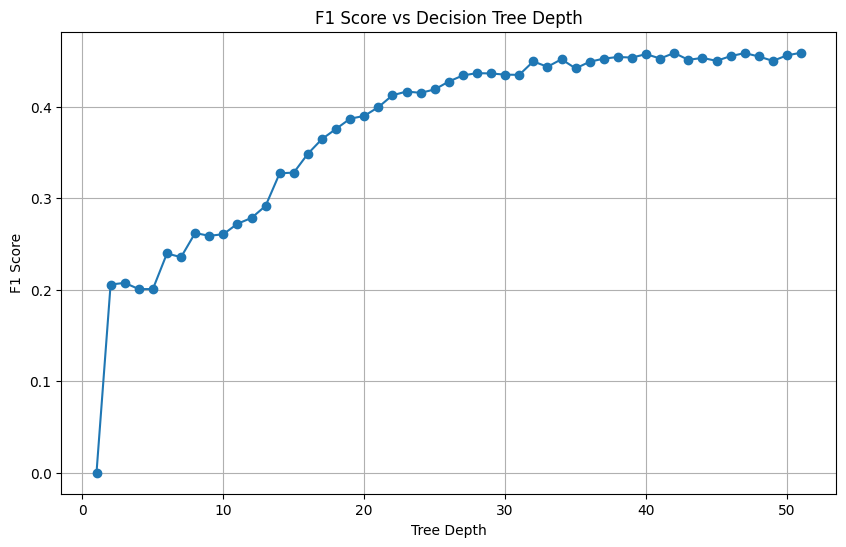

In [123]:
import matplotlib.pyplot as plt

f1_scores = []
depths = range(1, 52)

for depth in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(depths, f1_scores, marker='o')
plt.title('F1 Score vs Decision Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


While a higher max depth does seem to do generally better, even just a depth of two seems to be half useful and it only reaches 0.4 after a max_depth of >20 which is hard to visualize.

In [124]:
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Text(0.5, 0.8333333333333334, 'est_diameter_max <= 0.231\ngini = 0.177\nsamples = 72668\nvalue = [65557, 7111]\nclass = Not Hazardous'),
 Text(0.25, 0.5, 'est_diameter_max <= 0.22\ngini = 0.002\nsamples = 49256\nvalue = [49206.0, 50.0]\nclass = Not Hazardous'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 48462\nvalue = [48451, 11]\nclass = Not Hazardous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.093\nsamples = 794\nvalue = [755, 39]\nclass = Not Hazardous'),
 Text(0.75, 0.5, 'miss_distance <= 11367825.5\ngini = 0.421\nsamples = 23412\nvalue = [16351, 7061]\nclass = Not Hazardous'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.264\nsamples = 1063\nvalue = [166, 897]\nclass = Hazardous'),
 Text(0.875, 0.16666666666666666, 'gini = 0.399\nsamples = 22349\nvalue = [16185, 6164]\nclass = Not Hazardous')]

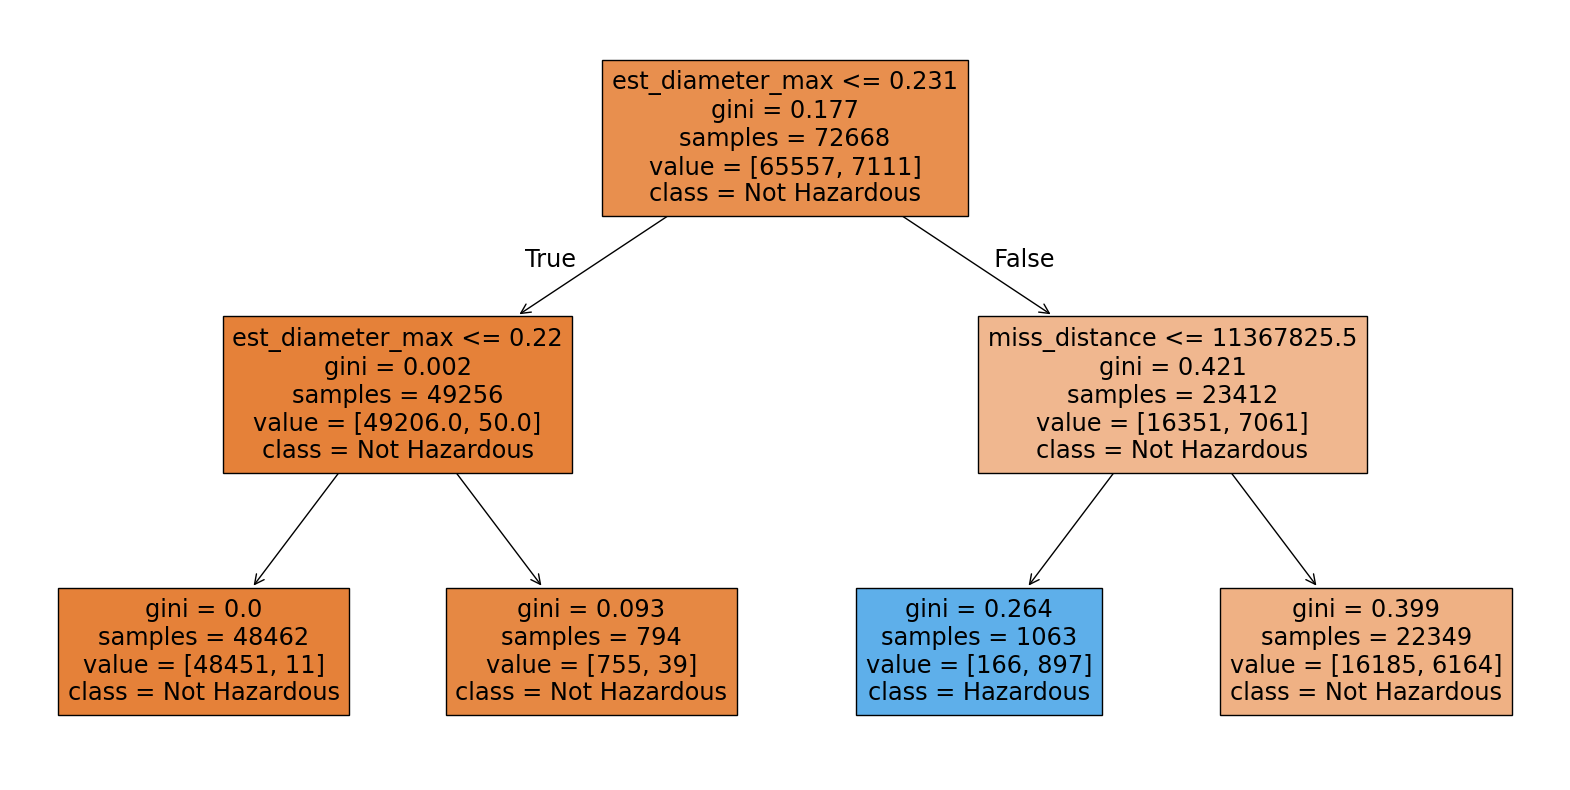

In [125]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Hazardous', 'Hazardous'])

Here it seems like the model decided that an object is dangerous if the maximum diameter is greater than around 230m and the miss distance is less than ~11.3 million km. 

However, since we may want to over-estimate the dangerousness of an object, I think it may be more useful to use **recall** for evaluation rather than the f1_score, so let's try that. 

Let's first see how our dummy model does.

In [138]:
from sklearn.metrics import recall_score

dummy = DummyClassifier(strategy='uniform', random_state=42) # uniform seems to work best here
dummy.fit(X_train, y_train)

recall_score(y_test, dummy.predict(X_test))

0.4783111625216888

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

highest_recall = 0
highest_recall_neighbors = 0
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    recall = recall_score(y_test, knn.predict(X_test))
    print(f"Recall for {i} neighbors: {recall}")
    if recall > highest_recall:
        highest_recall = recall
        highest_recall_neighbors = i
        print(f"New highest Recall: {highest_recall} with {highest_recall_neighbors} neighbors")
highest_recall, highest_recall_neighbors

Recall for 1 neighbors: 0.43724696356275305
New highest Recall: 0.43724696356275305 with 1 neighbors
Recall for 2 neighbors: 0.21226142278773857
Recall for 3 neighbors: 0.3655292076344708
Recall for 4 neighbors: 0.21804511278195488
Recall for 5 neighbors: 0.3042220936957779
Recall for 6 neighbors: 0.21399652978600348
Recall for 7 neighbors: 0.27703875072296125
Recall for 8 neighbors: 0.20358588779641412
Recall for 9 neighbors: 0.253903990746096
Recall for 10 neighbors: 0.20242914979757085
Recall for 11 neighbors: 0.24002313475997686
Recall for 12 neighbors: 0.19144013880855987
Recall for 13 neighbors: 0.22093695777906305
Recall for 14 neighbors: 0.18796992481203006
Recall for 15 neighbors: 0.21341816078658185
Recall for 16 neighbors: 0.18334297281665704
Recall for 17 neighbors: 0.20474262579525737
Recall for 18 neighbors: 0.17466743782533256
Recall for 19 neighbors: 0.19317524580682474


(0.43724696356275305, 1)

Doesn't seem very good. Let's try decision trees. 

c:\Users\filip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


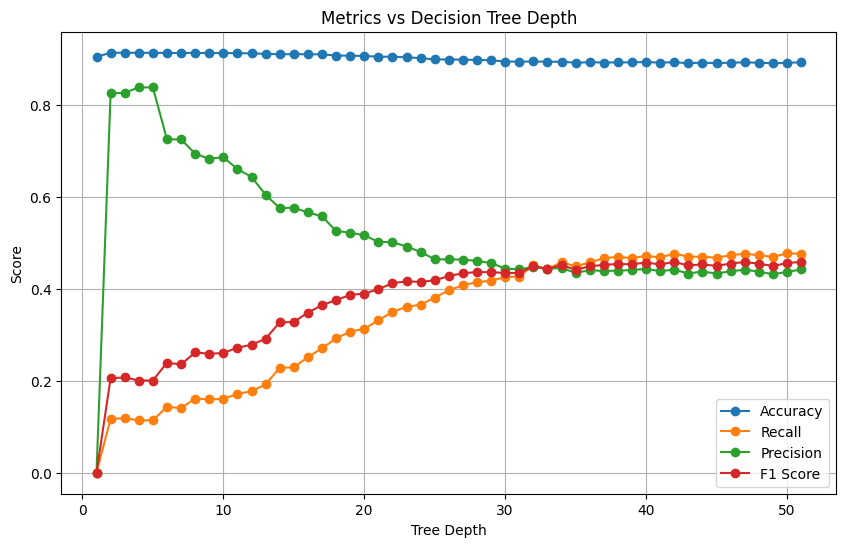

In [142]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
recalls = []
precisions = []
f1_scores = []
depths = range(1, 52)

for depth in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, label='Accuracy', marker='o')
plt.plot(depths, recalls, label='Recall', marker='o')
plt.plot(depths, precisions, label='Precision', marker='o')
plt.plot(depths, f1_scores, label='F1 Score', marker='o')
plt.title('Metrics vs Decision Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()